# Spilios Spiliopoulos 4495 
# Set 1 Machine Learning CSE

# Step 1: Import Libraries and Load Fashion MNIST Data
* Load data from Fashion MNIST dataset
* Normalize data to range (0-1) instead of range (0-255)
* From Keras documentation at @: https://keras.io/api/datasets/fashion_mnist/

In [17]:
import numpy as np
from keras.datasets import fashion_mnist

# Load Fashion MNIST data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

# Normalize the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Step 2: Downsample Images using Max Pooling
* Max Pooling with block_reduce function with stride = 4 in order to achieve (7,7)
* For each image of the training/testing dataset
* -> downsample to (7,7) for faster computation time and less parameters
* ( the max value of each block is the value that will represent the same block )

In [18]:
from skimage.measure import block_reduce

# Reducing the dimension of images using max pooling 4x4
train_images_downsampled = np.zeros((train_images.shape[0], 7, 7))
test_images_downsampled = np.zeros((test_images.shape[0], 7, 7))

# For each image of the training dataset
for i in range(train_images.shape[0]):
    train_images_downsampled[i] = block_reduce(train_images[i], (4, 4), np.max)
    
# For each image of the testing dataset
for i in range(test_images.shape[0]):
    test_images_downsampled[i] = block_reduce(test_images[i], (4, 4), np.max)

# Sampling Training Data
* In order to achieve less computation time, we modify the samples from 60000 to 30000 (50%)
* ( We can modify the percentage to keep = 1 in order to train the model with 60000 samples )
* Define percentage of the dataset
* For each category:
*  Find all the indeces of data that belong to that category
*  Multiply with percentage in order to keep the appropriate sample
*  Select random indices == to the number of our sample dataset (50% of indices)
*  Store the samples of those indeces to the appropriate lists:
*  a) list for image values
*  b) list for indeces of those values that are equal to the label of the images in list a)
*  Then combine results of those arrays to one array respectively
*  Shuffle the data in order to insert randomness and prevent bias

In [19]:
# Import necessary libraries for sampling data
import numpy as np

# Define the percentage of data to keep (50%)
percentage_to_keep = 0.5

# Initialize lists to store the sampled data
sampled_train_images = []
sampled_train_labels = []

# Iterate over each category
for category in range(10):  # There are 10 categories in Fashion MNIST
    # Find indices of data belonging to the current category
    category_indices = np.where(train_labels == category)[0]
    
    # Randomly sample a subset of data from the current category
    num_samples = int(len(category_indices) * percentage_to_keep)
    sampled_indices = np.random.choice(category_indices, num_samples, replace=False)
    
    # Add the sampled data to the lists
    sampled_train_images.append(train_images_downsampled[sampled_indices])
    sampled_train_labels.append(train_labels[sampled_indices])

# Concatenate the sampled data from all categories
sampled_train_images = np.concatenate(sampled_train_images, axis=0)
sampled_train_labels = np.concatenate(sampled_train_labels, axis=0)

# Shuffle the sampled data
shuffle_indices = np.random.permutation(len(sampled_train_images))
sampled_train_images = sampled_train_images[shuffle_indices]
sampled_train_labels = sampled_train_labels[shuffle_indices]

# Print the size of the sampled training set
print("Size of the sampled training set:", sampled_train_images.shape)

Size of the sampled training set: (30000, 7, 7)


# Step 3: Vectorize Images
* Reshape the sample_train_images/test_image from 7x7 ( 2D array ) to 1 x 49 ( 1D array ) format
* This vector format is compatible for the machine learning algorithms.

In [20]:
print("Size of the sampled training set before dimension reduction:", sampled_train_images.shape)
print("Size of the testing set before dimension reduction:", test_images.shape)

# Conversion of sampled images into vector format
sampled_train_images_vectorized = sampled_train_images.reshape(sampled_train_images.shape[0], -1)
test_images_vectorized = test_images_downsampled.reshape(test_images_downsampled.shape[0], -1)

print("Final size of the sampled training set after dimension reduction:", sampled_train_images_vectorized.shape)
print("Final size of the testing set after dimension reduction:", test_images_vectorized.shape)

Size of the sampled training set before dimension reduction: (30000, 7, 7)
Size of the testing set before dimension reduction: (10000, 28, 28)
Final size of the sampled training set after dimension reduction: (30000, 49)
Final size of the testing set after dimension reduction: (10000, 49)


# Step 4: K-Means Classification
# Implementation of the KMeans algorithm: 
 * For k = 1,3,5 neighbors
 * With Euclidean distance

In [21]:
################################ K MEANS #############################################
from sklearn.neighbors import KNeighborsClassifier

# Create the k-NN classifier with Euclidean distance
k_values = [1, 3, 5]
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_classifier.fit(sampled_train_images_vectorized, sampled_train_labels)

    # Evaluate the model on the testing set
    accuracy = knn_classifier.score(test_images_vectorized, test_labels)
    print("Accuracy for k =", k, ":", accuracy)
#####################################################################################

Accuracy for k = 1 : 0.7563
Accuracy for k = 3 : 0.7699
Accuracy for k = 5 : 0.7749


Step 5: Decision Tree and Random Forest

# Step 5.1 : Decision Tree
# Implementation of a Decision Tree with:
* Max depth = 10

Decision Tree Accuracy: 0.7026


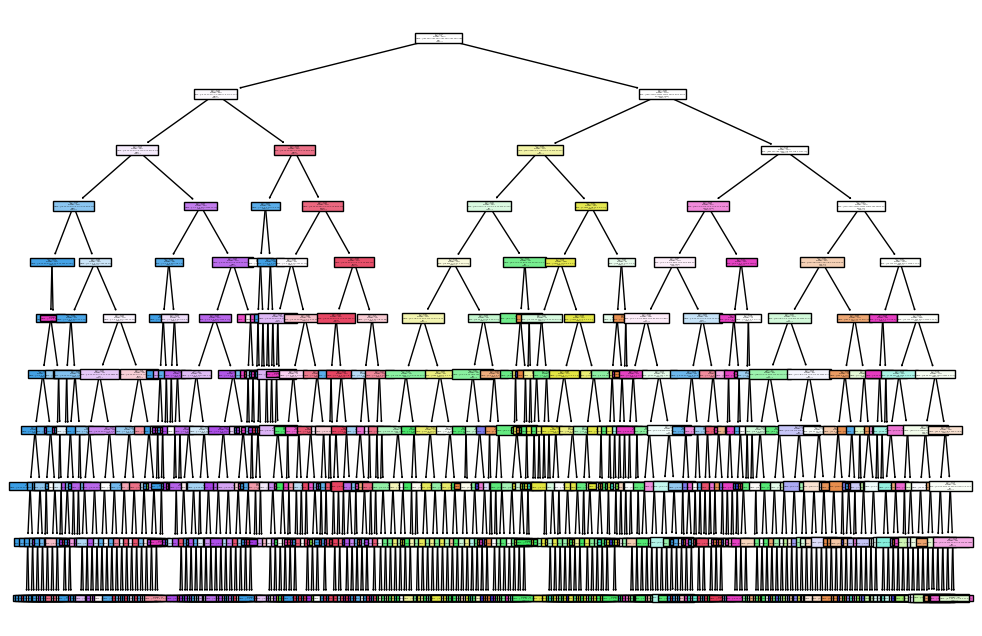

In [22]:
#################### Decision Tree ################################
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(sampled_train_images_vectorized, sampled_train_labels)

# Evaluate the decision tree model on the testing set
decision_tree_accuracy = decision_tree.score(test_images_vectorized, test_labels)

# Print the accuracy of the decision tree model
print("Decision Tree Accuracy:", decision_tree_accuracy)


# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, class_names=[str(i) for i in range(10)], feature_names=[str(i) for i in range(49)])
plt.show()

# Step 5.2: Random Forest
# Implementation of Random Forest algorithm with:
* n = 100 estimators

Random Forest Accuracy: 0.8089


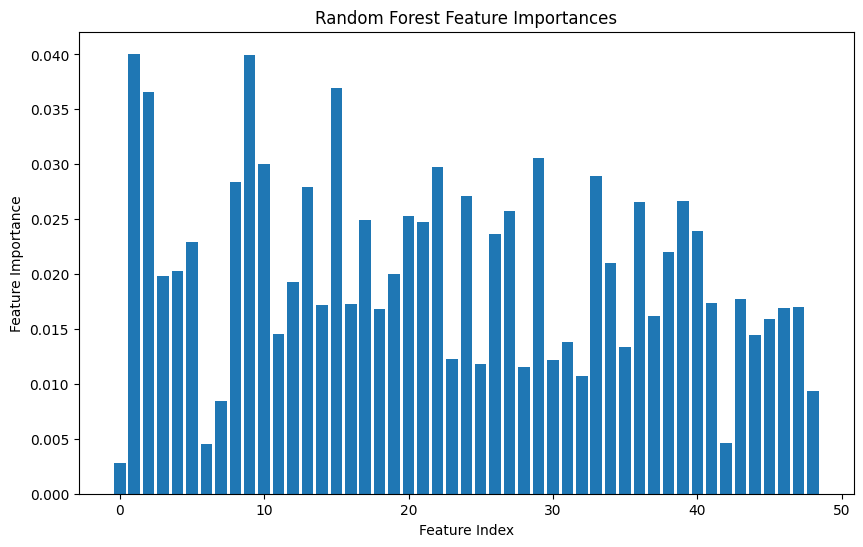

In [23]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(sampled_train_images_vectorized, sampled_train_labels)

# Evaluate the Random Forest model on the testing set
random_forest_accuracy = random_forest.score(test_images_vectorized, test_labels)

# Print the accuracy of the Random Forest model
print("Random Forest Accuracy:", random_forest_accuracy)


# Visualize Feature Importances for Random Forest
feature_importances = random_forest.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()
#####################################################################################

# Step 6: Support Vector Machine (SVM)
* C = [1,10,100]
* Max iterations = 500
* Linear SVM
* SVM with RBF kernel : gamma = [0.02, 0.1, 1]
  
* Standarize data in order to achieve best performance results in regards to features domination(magnitude)
* (For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.): StandardScaler()
* Implementation of both algorithms

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Standardize the data
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(sampled_train_images_vectorized)
test_images_scaled = scaler.transform(test_images_vectorized)

# Different values of C
C_values = [1, 10, 100]

# Train and evaluate SVM classifiers
for C in C_values:
    # Linear SVM classifier
    linear_svm = SVC(kernel='linear', C=C, max_iter=500)
    linear_svm.fit(train_images_scaled, sampled_train_labels)  # Corrected the labels here
    linear_accuracy = linear_svm.score(test_images_scaled, test_labels)
    print("Linear SVM with C =", C, "Accuracy:", linear_accuracy)

    # RBF kernel SVM classifier
    for gamma in [0.02, 0.1, 1]:
        rbf_svm = SVC(kernel='rbf', C=C, gamma=gamma, max_iter=500)
        rbf_svm.fit(train_images_scaled, sampled_train_labels)  # Corrected the labels here
        rbf_accuracy = rbf_svm.score(test_images_scaled, test_labels)
        print("RBF SVM with C =", C, "and gamma =", gamma, "Accuracy:", rbf_accuracy)

Linear SVM with C = 1 Accuracy: 0.5216
RBF SVM with C = 1 and gamma = 0.02 Accuracy: 0.6683
RBF SVM with C = 1 and gamma = 0.1 Accuracy: 0.7772
RBF SVM with C = 1 and gamma = 1 Accuracy: 0.684
Linear SVM with C = 10 Accuracy: 0.3091
RBF SVM with C = 10 and gamma = 0.02 Accuracy: 0.6923
RBF SVM with C = 10 and gamma = 0.1 Accuracy: 0.758
RBF SVM with C = 10 and gamma = 1 Accuracy: 0.5242
Linear SVM with C = 100 Accuracy: 0.3952
RBF SVM with C = 100 and gamma = 0.02 Accuracy: 0.6684
RBF SVM with C = 100 and gamma = 0.1 Accuracy: 0.6851
RBF SVM with C = 100 and gamma = 1 Accuracy: 0.5394


# Step 7: Feed Forward Neural Network
* Create a Sequential Model
* This sequential model consists of 3 layers (Dense func)
* Each layer has its own number of neurons
* On every hidden layer we use the LeakyRelU function (with a small negative slope)
* On the output layer we use the SoftMax function 
* *Extra: On the first layer we need to specify the number of features (shape[1])
 

In [25]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.layers import Input
import matplotlib.pyplot as plt

# Define the structure of the model
model = Sequential([
    Input(shape=(sampled_train_images_vectorized.shape[1],)),
    Dense(100, activation=LeakyReLU(negative_slope=0.1)),
    Dense(100, activation=LeakyReLU(negative_slope=0.1)),
    Dense(50, activation=LeakyReLU(negative_slope=0.1)),
    Dense(10, activation='softmax')
])

# Implmentation and Plot of the Sequential Model and Plot
* Batch size = 50 -> number of samples that will be passed to the network at the same time
* Epochs = 100 -> number of runs
* We want to print the last accuracy result of the model

Total number of parameters in the model: 20660
Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5917 - loss: 1.0978 - val_accuracy: 0.7275 - val_loss: 0.7145
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.7436 - loss: 0.6690 - val_accuracy: 0.7353 - val_loss: 0.6782
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.7581 - loss: 0.6254 - val_accuracy: 0.7655 - val_loss: 0.6301
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.7614 - loss: 0.6112 - val_accuracy: 0.7463 - val_loss: 0.6491
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.7719 - loss: 0.5925 - val_accuracy: 0.7674 - val_loss: 0.6136
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.7821 - loss: 0.5673 - val_accuracy: 0.7723 - val_loss: 0.5956
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.7902 - loss: 0.5514 - val_accuracy: 0.7775 - val_loss: 0.5890
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━

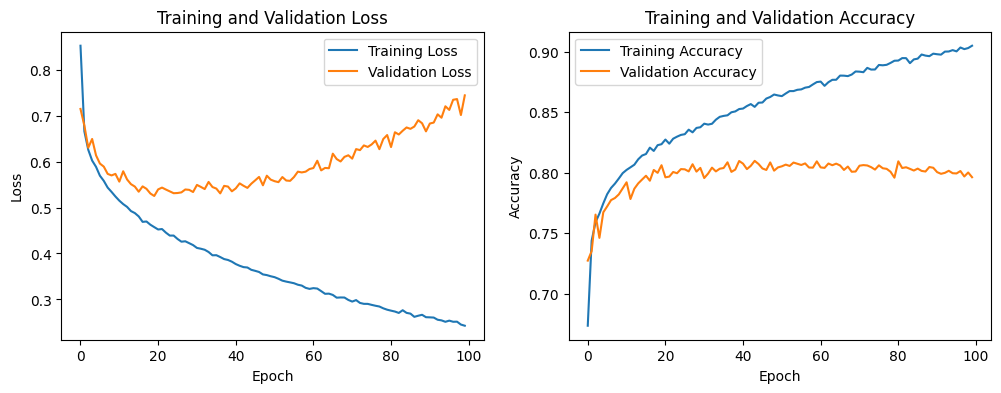

In [26]:
# Total number of parameters in the model
num_parameters = model.count_params()
print("Total number of parameters in the model:", num_parameters)

# Define the loss function and optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(sampled_train_images_vectorized, sampled_train_labels, epochs=100, batch_size=50, validation_data=(test_images_vectorized, test_labels))


# Extract final accuracy from history object
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Print the final accuracy
print("Final Training Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)



# Plot the loss function and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

# Step 8: Convolutional Neural Network (CNN) 
* Version 1
* **2** Convolutional Layers
* Max Pooling
* Dense with Dropout
* Optimizer = Adam
* Loss function = 'Categorical Cross Entropy'

Total number of parameters in the model: 77526
Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5318 - loss: 1.2301 - val_accuracy: 0.7355 - val_loss: 0.6919
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7172 - val_accuracy: 0.7668 - val_loss: 0.6182
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7604 - loss: 0.6352 - val_accuracy: 0.7832 - val_loss: 0.5775
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7835 - loss: 0.5800 - val_accuracy: 0.7917 - val_loss: 0.5546
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7952 - loss: 0.5475 - val_accuracy: 0.7970 - val_loss: 0.5362
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7984 - loss: 0.5335 - val_accuracy: 0.8025 - val_loss: 0.5268
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8025 - loss: 0.5212 - val_accuracy: 0.8062 - val_loss: 0.5195
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

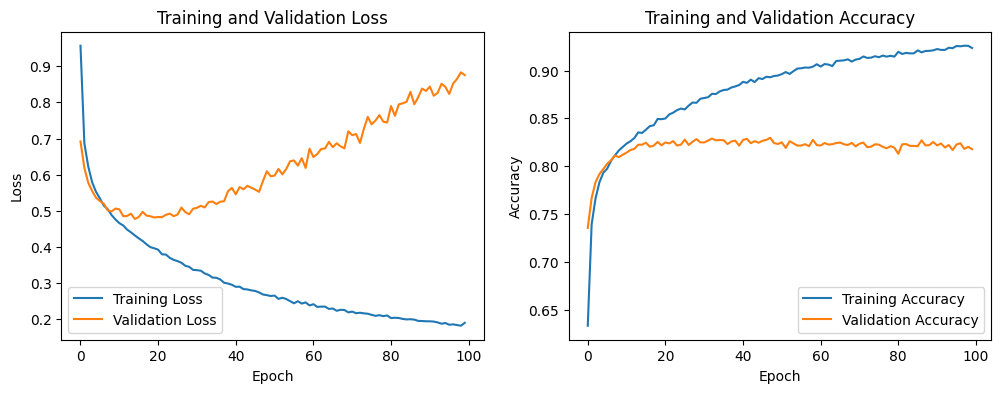

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the CNN model structure
# (We could just pass in the format 49x1 but we need to reshape it because we want 7x7)
model = Sequential([
    Input(shape=(7, 7, 1)),  # Define input shape
    Conv2D(32, (3, 3), activation='relu', padding= 'same'), 
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Conv2D(128, (3, 3), activation='relu', padding= 'same'),  # Add another convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# Total number of parameters in the model
num_parameters = model.count_params()
print("Total number of parameters in the model:", num_parameters)

# Define the loss function and optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (We could just pass in the format 49x1 but we need to reshape it because we want 7x7) 
history = model.fit(sampled_train_images_vectorized.reshape(-1, 7, 7, 1), sampled_train_labels, epochs=100, batch_size=50, validation_data=(test_images_vectorized.reshape(-1, 7, 7, 1), test_labels))

# Extract final accuracy from history object
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy:", final_training_accuracy)
print("Final Validation Accuracy:", final_validation_accuracy)


# Plot the loss function and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


# Step 8: Convolutional Neural Network (CNN) 
* Version 2
* **3** Convolutional Layers
* Max Pooling
* Dense with Dropout
* Optimizer = Adam
* Loss function = 'Categorical Cross Entropy'

Total number of parameters in the model: 150832
Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5398 - loss: 1.2024 - val_accuracy: 0.7282 - val_loss: 0.7000
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7395 - loss: 0.6888 - val_accuracy: 0.7755 - val_loss: 0.5887
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7719 - loss: 0.6015 - val_accuracy: 0.7857 - val_loss: 0.5690
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7904 - loss: 0.5559 - val_accuracy: 0.8049 - val_loss: 0.5279
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8036 - loss: 0.5243 - val_accuracy: 0.8056 - val_loss: 0.5170
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8099 - loss: 0.5023 - val_accuracy: 0.8137 - val_loss: 0.5172
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8239 - loss: 0.4646 - val_accuracy: 0.8142 - val_loss: 0.5001
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/s

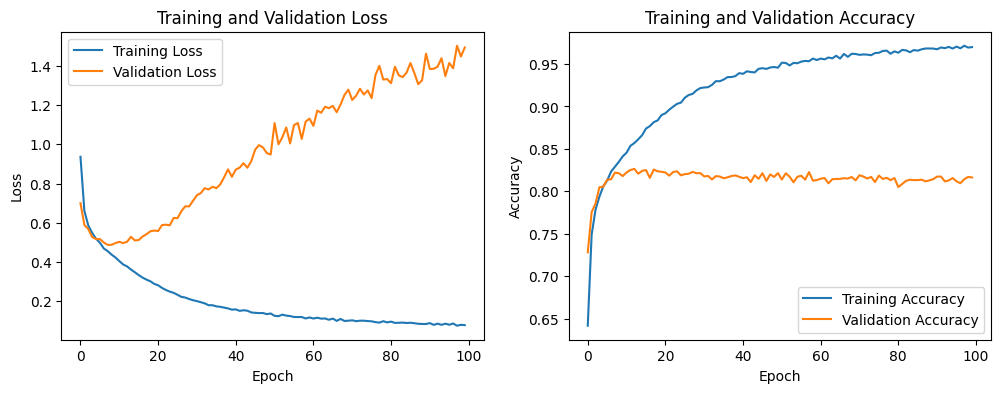

In [33]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the CNN model structure
# (We could just pass in the format 49x1 but we need to reshape it because we want 7x7)
model = Sequential([
    Input(shape=(7, 7, 1)),  # Define input shape
    Conv2D(32, (3, 3), activation='relu', padding= 'same'), 
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding= 'same'),  # Add another convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.15),
    Dense(10, activation='softmax')
])


# Total number of parameters in the model
num_parameters = model.count_params()
print("Total number of parameters in the model:", num_parameters)

# Define the loss function and optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (We could just pass in the format 49x1 but we need to reshape it because we want 7x7) 
history = model.fit(sampled_train_images_vectorized.reshape(-1, 7, 7, 1), sampled_train_labels, epochs=100, batch_size=50, validation_data=(test_images_vectorized.reshape(-1, 7, 7, 1), test_labels))

# Extract final accuracy from history object
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy:", final_training_accuracy)
print("Final Validation Accuracy:", final_validation_accuracy)


# Plot the loss function and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


# Step 8: Convolutional Neural Network (CNN) 
* Version 3
* **2** Convolutional Layers
* Max Pooling
* Dense with Dropout
* Optimizer = Adam
* Loss function = 'Categorical Cross Entropy'

Total number of parameters in the model: 48176
Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4792 - loss: 1.3917 - val_accuracy: 0.7129 - val_loss: 0.7585
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6976 - loss: 0.8225 - val_accuracy: 0.7423 - val_loss: 0.6698
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7247 - loss: 0.7393 - val_accuracy: 0.7573 - val_loss: 0.6357
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7382 - loss: 0.6994 - val_accuracy: 0.7815 - val_loss: 0.5934
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7528 - loss: 0.6643 - val_accuracy: 0.7849 - val_loss: 0.5741
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7651 - loss: 0.6236 - val_accuracy: 0.7866 - val_loss: 0.5627
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7655 - loss: 0.6195 - val_accuracy: 0.7881 - val_loss: 0.5573
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

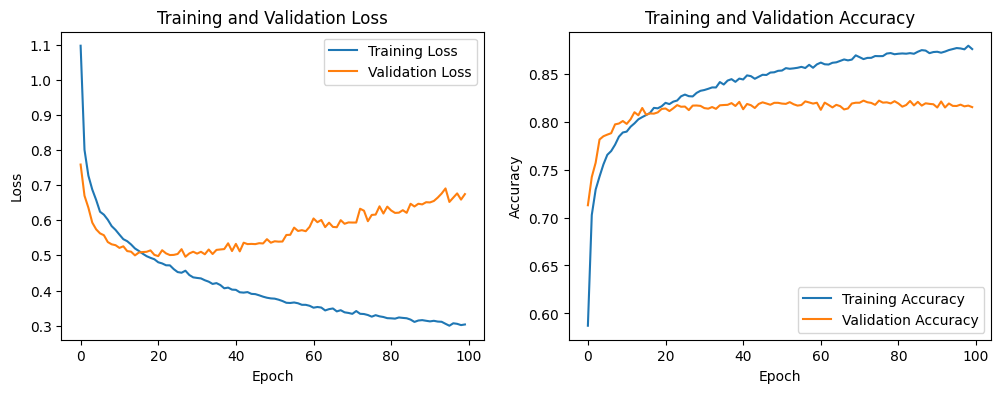

In [35]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the CNN model structure
# (We could just pass in the format 49x1 but we need to reshape it because we want 7x7)
model = Sequential([
    Input(shape=(7, 7, 1)),  # Define input shape
    Conv2D(32, (3, 3), activation='relu', padding= 'same'), 
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Conv2D(128, (3, 3), activation='relu', padding= 'same'),  # Add another convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])


# Total number of parameters in the model
num_parameters = model.count_params()
print("Total number of parameters in the model:", num_parameters)

# Define the loss function and optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (We could just pass in the format 49x1 but we need to reshape it because we want 7x7) 
history = model.fit(sampled_train_images_vectorized.reshape(-1, 7, 7, 1), sampled_train_labels, epochs=100, batch_size=50, validation_data=(test_images_vectorized.reshape(-1, 7, 7, 1), test_labels))

# Extract final accuracy from history object
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Accuracy:", final_training_accuracy)
print("Final Validation Accuracy:", final_validation_accuracy)


# Plot the loss function and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


# 8: Observations
As we can see, there are some impactfull changes with adjusting the convolution layers in our model.

1) At the 1st version of our CNN model with 2 convolution layers, 100 fully connected neurons and Dropout = 0.3,the validation loss is around 0.88 and the validation accuracyis around 0.82
2) At the 2nd version of our CNN model with 3 convolution layers, 50 fully connected neurons and Dropout = 0.15, the validation loss is around 1.5 and the validation accuracy is around 0.82
3) At the 1st version of our CNN model with 2 convolution layers, the validation loss is around 0.68 and the validation accuracy is around 0.82

We can conclude that the best model of the 3 versions for the CNN is the last one because:
* It has the minimum validation loss score on unseen data
* It has the same validation accuracy score as the other versions

Reasons that might cause the validation loss score to be greater than 1:
* Overfitting
* High Learn Rate

# FOR PDF Extraction:
* Install pandoc from https://github.com/jgm/pandoc/releases/tag/3.1.13
* pip install nbconvert[webpdf]
# Open Terminal
* Navigate to the directory that contains the file ml_1.ipynb
* Enter: **jupyter nbconvert --to webpdf --allow-chromium-download ml_1.ipynb** at the command prompt